<div align="right">Wanchana Ponthongmak<br>
6136168 RADS/D<br>
RADS611 Advance Modeling</div>

# <b> Age Prediction from face image by Deep Learning

## <b>Introduction

<p style="text-indent: 2.5em;">
    Age and gender are the key facial attributes, play an essential role in social interactions. Automatic age and gender prediction have become relevant to an increasing amount of applications, particularly when social platforms and social media become common in human's daily life. Estimation of age and gender from a face image is a critical task in artificial intelligence applications, such as access control, human-computer interaction, law enforcement, marketing intelligence, and visual surveillance.
    
<p style="text-indent: 2.5em;">    
    In deep learning, the Convolutional Neural Network (CNNs) is one of the primary methods to do images recognition, images classifications. Objects detections, recognition faces, etc., are some of the areas where CNNs are widely used. CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons is a fully connected network; that is, each neuron in one layer is connected to all neurons in the next layer. The multilayer perceptrons always prone to overfitting data. However, CNNs take advantage of the hierarchical pattern in data and assemble more complex patterns using smaller and simpler patterns to regularize to reduce overfitting.
    
<p style="text-indent: 2.5em;">
    The aim of this study is to create a model to classify age group from the Adience face image project, the face images provided by the open university of Israel. The aligned face images are retrieved, then resize and feed into the model in order to train the best model for face prediction.

## <b>Data Acquisition

<p style="text-indent: 2.5em;">
    The data used in this study derived from Adience face image project, the open university of Israel. The data is downloaded then extract into the computer drive. The link of the dataset is https://talhassner.github.io/home/projects/Adience/Adience-data.html . The data used in this study include, fold.txt files and image files in the aligned folder which derived from extract aligned.tar.gz as shown in the figure below,

![](./images/files.jpg)

## <b>Methodology

<p style="text-indent: 2.5em;">
    The study methodology consists of eight phases, range from creating file path for data retrieval from file path directory to model evaluation and visualization by face images provided by the open university of Israel.

<b> 1 Creating File Path 
<p style="text-indent: 2.5em;">
    The file path of each sample is created in order to retrieval the image from the image folder in file directory.

<b> 2 Data Concatenation
<p style="text-indent: 2.5em;">
    The samples were separated into five text files, namely, fold zero to fold five. all fold is merged into a single file called fold.

<b> 3 Non-Relevance Label Removal
<p style="text-indent: 2.5em;">
    Some samples do not have an age group as a label; these samples will be removed from the dataset.

<b> 4 Data Splitting
<p style="text-indent: 2.5em;">
    The dataset was split into three sets, including train set, validate set, and test set with splitting ratio at 80: 10: 10

<b> 5 Data Augmentation
<p style="text-indent: 2.5em;">
    The images from train set were augmented by randomly width shifting, height shifting, horizontal flipping, and zoom in before feeding into the training model.

<b> 6 Data Retrieval
<p style="text-indent: 2.5em;">
    The images from the file directory will be feed into the model in small amount in each batch in order to minimize memory used.

<b> 7 Model Experiment
<p style="text-indent: 2.5em;">
    The models used in the experiment derived from two CNNs pre-trained architecture with difference weight training sources including, 1) ResNet50 architecture with Imagenet weight training and 2) VGG-Very-Deep-16 CNN architecture + VGG-Face weight training.
<p style="text-indent: 2.5em;">
    The models are trained by freezing the model parameters in all model layer then train the model and monitor the model accuracy. If the model accuracy is not passed the satisfaction level, the model layers are unfreezing to train more parameters to get a better result.

<b> 8 Model Evaluation and Visualization
<p style="text-indent: 2.5em;">
    The model evaluation and visualization are used several matrices to assess model performance, such as ROC curve, PR curve, and F1.

<b> 9 Conclusions, Discussions, and Limitations

## <b>Get Start

### Required Libraries

In [6]:
# set the seed to ensure reproductive of model results
from numpy.random import seed
seed(6)
from tensorflow import set_random_seed
set_random_seed(6)
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import keras
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, MaxPooling2D, BatchNormalization, Flatten,\
ZeroPadding2D, Convolution2D, Activation, GlobalMaxPooling2D
from keras.applications.resnet50 import ResNet50
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve,\
average_precision_score, f1_score, auc, balanced_accuracy_score 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from keras.utils import to_categorical
from itertools import cycle
from collections import Counter
from scipy import interp
import itertools

cwd = os.getcwd()
print(cwd)

/home/jupyter/agedetect


In [7]:
# Set dataframe display
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', -1)

## 1) Creating File Path 

In [8]:
# this defined function used to create paths for retrieving data from the directory
def importdata(filename):
    # read text file from path directory separated data by tab 
    fold = pd.read_csv(filename + ".txt", sep = '\t')
    # create paths to retrieve data 
    fold['path'] = fold.apply(lambda x: "aligned/" + x['user_id'] + \
        "/landmark_aligned_face.{}.{}".format(x['face_id'], x['original_image']), axis=1)
    return fold

In [9]:
fold_0 = importdata('fold_0_data')
fold_1 = importdata('fold_1_data')
fold_2 = importdata('fold_2_data')
fold_3 = importdata('fold_3_data')
fold_4 = importdata('fold_4_data')

## 2) Data Concatenation

In [10]:
# pool all sample from 5 files into one
fold = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4,], axis = 0)

# reset index
fold = fold.reset_index(drop = True)
del fold_0, fold_1, fold_2, fold_3, fold_4

In [11]:
# show the first five samples in fold dataframe
fold.head(5)

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score,path
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17,aligned/30601258@N03/landmark_aligned_face.1.10399646885_67c7d20df9_o.jpg
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94,aligned/30601258@N03/landmark_aligned_face.2.10424815813_e94629b1ec_o.jpg
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74,aligned/30601258@N03/landmark_aligned_face.1.10437979845_5985be4b26_o.jpg
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47,aligned/30601258@N03/landmark_aligned_face.3.10437979845_5985be4b26_o.jpg
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34,aligned/30601258@N03/landmark_aligned_face.2.11816644924_075c3d8d59_o.jpg


In [12]:
fold.shape

(19370, 13)

## 3) Non-Relevance Label Removal

In [13]:
# this defined function used to flag and remove non-relevance label class
def remove_unlabel(fold):
    dict_age = {'(0, 2)' : 0,
                '(4, 6)' : 1,
                '(8, 12)' : 2,
                '(15, 20)' : 3,
                '(25, 32)' : 4,
                '(38, 43)' : 5,
                '(48, 53)' : 6,
                '(60, 100)' : 7}
    # flag the filter to remove non-group age 
    fold['age_filter'] = fold['age'].apply(lambda x: int(x in dict_age))
    fold = fold[fold['age_filter'] == 1]
    return fold

In [14]:
fold_clean = remove_unlabel(fold)

In [15]:
fold_clean.shape

(17393, 14)

In [16]:
print('There are {:,} samples were removed'.format(fold.shape[0] - fold_clean.shape[0]))

There are 1,977 samples were removed


In [17]:
# encode label into numeric data
dict_age = {'(0, 2)' : 0, '(4, 6)' : 1, '(8, 12)' : 2, '(15, 20)' : 3,
            '(25, 32)' : 4,'(38, 43)' : 5,'(48, 53)' : 6,'(60, 100)' : 7}

In [18]:
# extract list of path directory 
filenames = list(fold_clean['path'])

In [19]:
filenames[0:5]

['aligned/30601258@N03/landmark_aligned_face.1.10399646885_67c7d20df9_o.jpg',
 'aligned/30601258@N03/landmark_aligned_face.2.10424815813_e94629b1ec_o.jpg',
 'aligned/30601258@N03/landmark_aligned_face.1.10437979845_5985be4b26_o.jpg',
 'aligned/30601258@N03/landmark_aligned_face.3.10437979845_5985be4b26_o.jpg',
 'aligned/30601258@N03/landmark_aligned_face.2.11816644924_075c3d8d59_o.jpg']

In [20]:
y = np.array([dict_age[a] for a in fold_clean.age.values])

In [21]:
y[0:5]

array([4, 4, 4, 4, 4])

In [22]:
# shuffle the list of file path
filenames, y = shuffle(filenames, y, random_state = 6)
filenames = np.array(filenames)

In [23]:
filenames[0:5]

array(['aligned/101071073@N04/landmark_aligned_face.708.10658628663_23fd62aab9_o.jpg',
       'aligned/7411850@N04/landmark_aligned_face.465.11098536056_b8f250b5f7_o.jpg',
       'aligned/113715068@N06/landmark_aligned_face.1416.11873684324_9ae77eab11_o.jpg',
       'aligned/7651777@N03/landmark_aligned_face.1590.8448553152_ee57286766_o.jpg',
       'aligned/18142498@N06/landmark_aligned_face.803.11555598623_97c27737f6_o.jpg'],
      dtype='<U77')

In [24]:
del fold, fold_clean

### Data Characteristics and Age Histogram

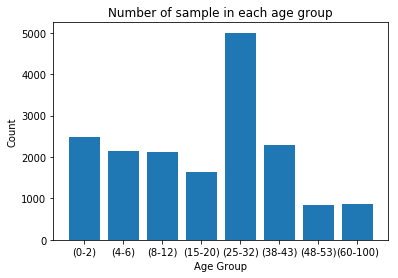

In [25]:
# plot the data characteristics
objects = ["(0-2)", "(4-6)", "(8-12)", "(15-20)", "(25-32)", "(38-43)", "(48-53)", "(60-100)"]
c = Counter(y)
plt.bar(objects, c.values(), align = 'center')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Number of sample in each age group')
plt.show()

<p style="text-indent: 2.5em;">
    According to the age histogram, the majority of samples are about 25-32 years old (approximate 5,000) and the smallest group is 45-53 years old, which has less than 1,000 samples.

## 4) Data Splitting

In [26]:
# split data into three set
def split(X, y, test_size = 0.1):
    Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size = test_size,
                                              random_state = 6, stratify = y)
    return Xtrn, Xtst, ytrn, ytst

# the ratio at 0.1
Xtrn, Xtst, ytrn, ytst = split(filenames, y, test_size = 0.1)
Xtrn, Xval, ytrn, yval = split(Xtrn, ytrn, test_size = 0.11111)

del filenames, y

## 5) Data Augmentation

In [27]:
# create defined function to augment the images 
datagen = ImageDataGenerator(rotation_range = 6, 
                             width_shift_range = 0.1,
                             height_shift_range = 0.1, 
                             horizontal_flip = True,
                             zoom_range=0.1)

def augment(imp):
    imp = datagen.random_transform(imp,  seed = 6)
    return imp

## 6) Data Retrieval

In [28]:
### Creation of Custom Generator
# Custom Generator class inherit from the keras sequence class.
class Generator_Trn(keras.utils.Sequence) :
    # feed parameters to the generator. image filenames as image_filenames, labels as labels and the batch size as batch_size
    def __init__(self, image_filenames, labels, batch_size) :
        self.image_filenames = image_filenames
        self.labels = labels
        self.batch_size = batch_size

    # This function computes the step per epoch (from the number of samples // batch size)
    def __len__(self) :
        return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
    
    def __getitem__(self, idx) :
        batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
        # This function happens when the batch is loaded in the dataset.
        # read image from the directory in filenames within RGB channels
        # resize to 224 x 224 pixels
        # standardize by divided by 255.0 to scale the value into range 0-1
        return np.array([
            augment(cv2.resize(cv2.imread(file_name, 1), (224, 224), interpolation = cv2.INTER_AREA))
            for file_name in batch_x])/255.0, np.array(batch_y)

    
# Custom Generator for validate set without augmentation
class Generator_Val(keras.utils.Sequence) :
    def __init__(self, image_filenames, labels, batch_size) :
        self.image_filenames = image_filenames
        self.labels = labels
        self.batch_size = batch_size
    
    def __len__(self) :
        return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)

    def __getitem__(self, idx) :
        batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
        return np.array([
            cv2.resize(cv2.imread(file_name, 1), (224, 224), interpolation = cv2.INTER_AREA)
            for file_name in batch_x])/255.0, np.array(batch_y)    
    
    
# Custom Generator for test set without augmentation and batch size is fixed to 1
class Generator_Tst(keras.utils.Sequence) :
    
    def __init__(self, image_filenames, labels) :
        self.image_filenames = image_filenames
        self.labels = labels
        self.batch_size = 1
    
    def __len__(self) :\
        return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)

    def __getitem__(self, idx) :
        batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
        return np.array([
            cv2.resize(cv2.imread(file_name, 1), (224, 224), interpolation = cv2.INTER_AREA)
            for file_name in batch_x])/255.0, np.array(batch_y)

In [29]:
# determine the batch size
batch_size = 64

training_batch_generator = Generator_Trn(Xtrn, ytrn, batch_size)
validation_batch_generator = Generator_Val(Xval, yval, batch_size)
testing_batch_generator = Generator_Tst(Xtst, ytst)

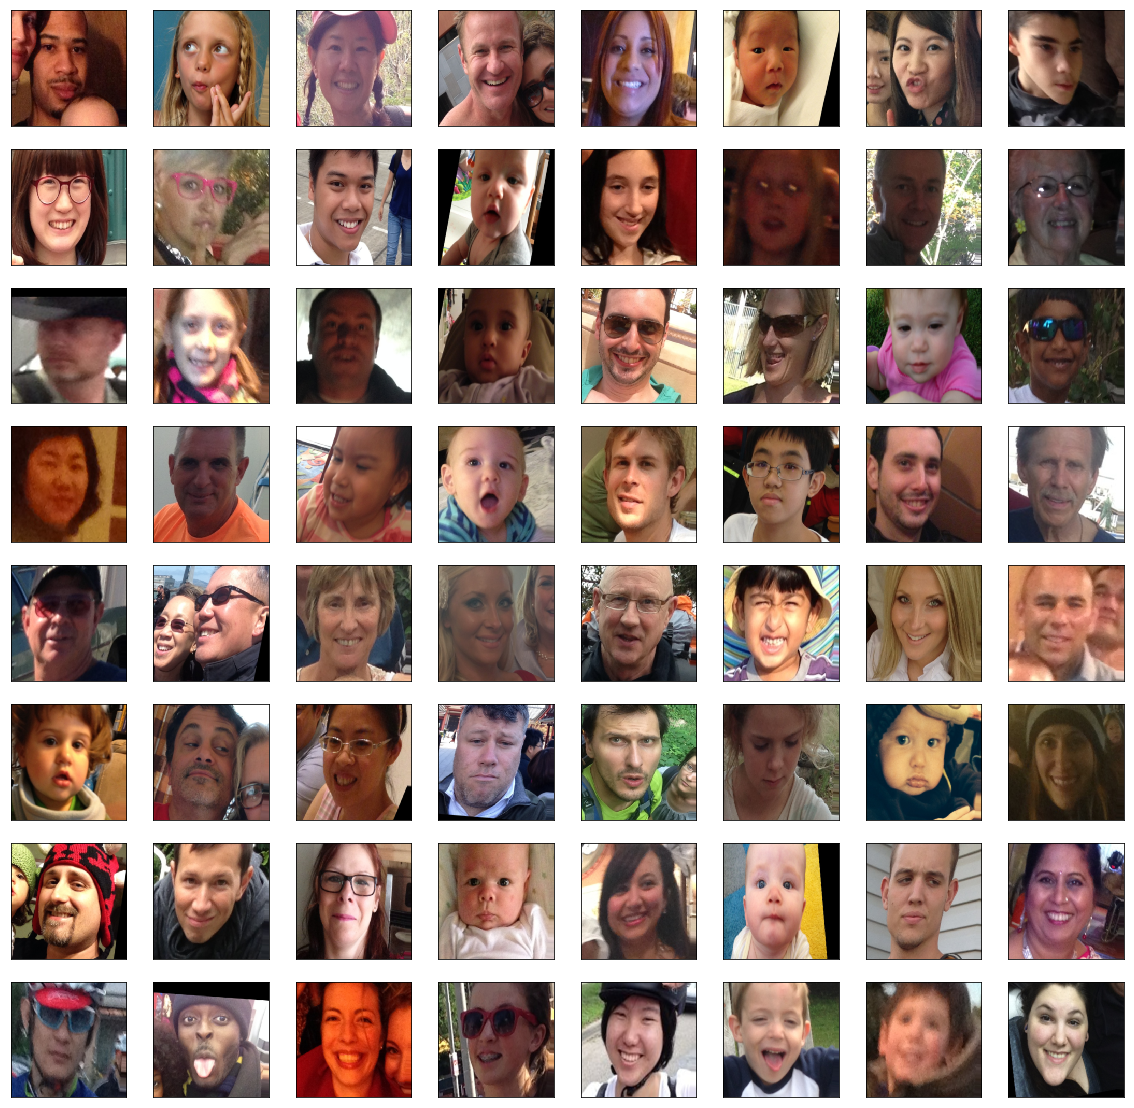

In [26]:
# the example of image
plt.figure(figsize = (20,20))
for i in range(batch_size):
    plt.subplot(8,8,i+1)
    plt.imshow(cv2.cvtColor(np.float32(Generator_Trn.__getitem__(training_batch_generator,i)[0][0]), cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])

The examples of human face image in training set in the first batch are shown above.

## 7) Model Experiment

### 7.1) ResNet50 architecture + imagenet weight training

#### the architecture and the example of visualization are shown belows

![](./images/Resnet50.PNG)

reference: https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d#e4b1

<p style="text-indent: 2.5em;">
Many CNNs try to increase the number of layers in the design to achieve better performance. But “with the network depth increasing, accuracy gets saturated and then degrades rapidly.”. Moreover, the vanishing gradient problem more likely to occur according to the increasing the number of layers. The Resnet architecture design for addressing this problem by using skip connections (a.k.a. shortcut connections, residuals), while building deeper models.

![](./images/imagenet.PNG)

https://blog.acolyer.org/2016/04/20/imagenet-classification-with-deep-convolutional-neural-networks/

The examples of picture in imagenet are shown above

In [27]:
# download pre-trained model from keras application
model_ResNet50_base = ResNet50(weights='imagenet', include_top=False)

<p style="text-indent: 2.5em;">
    In this study, the ResNet50 architecture with weight training from imagenet is used to train the model. The output layer is removed then replace by three dense layers, three dropout layers, and global max pooling as shown below. There are 23,798,070 parameters in the model. The experiment will focus on freeze and unfreeze of the parameter's weight in the hidden layers inside the model.

In [28]:
# freeze model layer
for layer in model_ResNet50_base.layers[:-7]:
   layer.trainable = False
# unfreeze model layer
for layer in model_ResNet50_base.layers[-7:]:
   layer.trainable = True

<p style="text-indent: 2.5em;">
    In this study, the ResNet50 architecture will exclude the top layer (output dense) and build seven more layer top up on the model. We call this model as ResNetmod. The new layer includes 1) global max pooling, 2) dropout, 3) dense 100d, 4) dropout, 5) dense 50d, 6) dropout, and 7) output dense with 8d.
<p style="text-indent: 2.5em;">
    The activation function and regularizer are experimented and changed several times in order to achieve the best model performance. For instance, relu, selu, sigmoid, and tanh are used, but the relu provide higher performance. Moreover, the L2 regularizer also added into the model.

In [30]:
# build the new output layer and the hidden layers before it
ResNetmod = model_ResNet50_base.output
ResNetmod = GlobalMaxPooling2D()(ResNetmod)
ResNetmod = Dropout(0.5)(ResNetmod)
ResNetmod = Dense(100, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01))(ResNetmod)
ResNetmod = Dropout(0.5)(ResNetmod)
ResNetmod = Dense(50, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01))(ResNetmod)
ResNetmod = Dropout(0.5)(ResNetmod)
ResNetmod = Dense(8, activation="softmax")(ResNetmod)

# combine pre-trained architecture with the new custom output layers
ResNet = Model(model_ResNet50_base.input, ResNetmod)
ResNet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

#### the trainable parameters = 3,625,910

In [32]:
## compile model
# using sparse_categorical_crossentropy for categorical y
# learning rate = 0.00001
# momentum decay = 0.9
# scaling decay = 0.999
ResNet.compile(loss="sparse_categorical_crossentropy", metrics = ['acc'], optimizer = keras.optimizers.Adam(lr = 0.00001, beta_1 = 0.9, beta_2 = 0.999))

In [ ]:
# create check point path
os.mknod('./ResNet_checkpoint.h5')

In [33]:
## create callback list
# check point for saving best model weight and architecture
ck_ResNet = keras.callbacks.ModelCheckpoint("ResNet_checkpoint.h5", monitor = 'val_acc', save_best_only = True)
# Early stop criteria in validation loss
es1_ResNet = keras.callbacks.EarlyStopping(patience = 10, min_delta = 0.001, monitor = 'val_loss')
# Early stop criteria in validation accuracy
es2_ResNet = keras.callbacks.EarlyStopping(patience = 10, min_delta = 0.001, monitor = 'val_acc')
# create class weight for imbalance class
class_weights = class_weight.compute_class_weight('balanced', np.unique(ytrn), ytrn)

In [46]:
# fit the model
history_ResNet = ResNet.fit_generator(generator=training_batch_generator,
                                      steps_per_epoch = training_batch_generator.__len__(),
                                      epochs = 500, verbose = 1,
                                      validation_data = validation_batch_generator,
                                      validation_steps = validation_batch_generator.__len__(),
                                      callbacks = [ck_ResNet, es1_ResNet, es2_ResNet],
                                      workers = 20, 
                                      class_weight = class_weights)

Epoch 1/500
218/218 [==============================] - 127s 584ms/step - loss: 12.5390 - acc: 0.1863 - val_loss: 5.2030 - val_acc: 0.2879
Epoch 2/500
218/218 [==============================] - 128s 587ms/step - loss: 11.2891 - acc: 0.1952 - val_loss: 4.8456 - val_acc: 0.2879
Epoch 3/500
218/218 [==============================] - 128s 588ms/step - loss: 9.8859 - acc: 0.1838 - val_loss: 4.6491 - val_acc: 0.2879
Epoch 4/500
218/218 [==============================] - 128s 587ms/step - loss: 8.1158 - acc: 0.1829 - val_loss: 4.5808 - val_acc: 0.2879
Epoch 5/500
218/218 [==============================] - 128s 587ms/step - loss: 6.6046 - acc: 0.1771 - val_loss: 4.5444 - val_acc: 0.2879
Epoch 6/500
218/218 [==============================] - 128s 589ms/step - loss: 5.6131 - acc: 0.1883 - val_loss: 4.5326 - val_acc: 0.2879
Epoch 7/500
218/218 [==============================] - 128s 587ms/step - loss: 5.1663 - acc: 0.2038 - val_loss: 4.5321 - val_acc: 0.2879
Epoch 8/500
218/218 [==================

In [47]:
joblib.dump(history_ResNet, './dict/history_ResNet.pkl')

['./dict/history_ResNet.pkl']

In [35]:
# history_ResNet = joblib.load('./dict/history_ResNet.pkl')

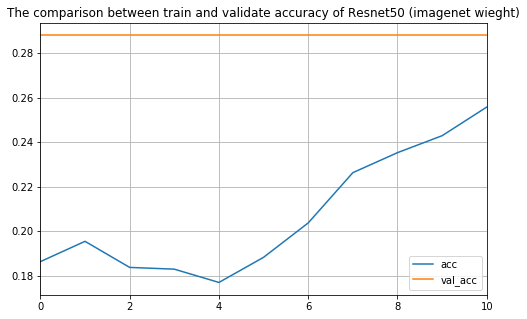

In [36]:
pd.DataFrame(history_ResNet.history).loc[:,['acc','val_acc']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.title('The comparison between train and validate accuracy of Resnet50 (imagenet wieght)')
plt.show()

The training accuracy is very low and validate accuracy is very low and doesn't move since the first epoch indicate that the model is not worth to apply or extend to other work.

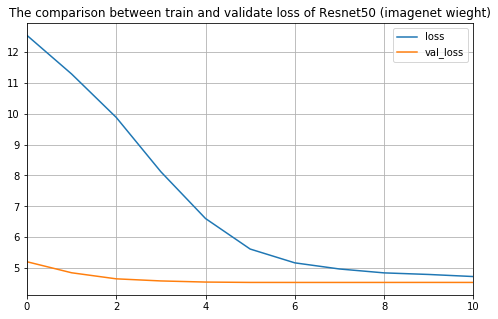

In [37]:
pd.DataFrame(history_ResNet.history).loc[:,['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.title('The comparison between train and validate loss of Resnet50 (imagenet wieght)')
plt.show()

<p style="text-indent: 2.5em;">
    After experimenting on unfreezing model layer several times, the train and validate accuracies of the Resnet50 pre-trained model (Resnet50 architecture + imagenet weight training) do not increase (validate accuracy stuck at 0.2879) to the satisfaction level. As a result, this model is not suitable for the study. This may be caused by the weight training trained by imagenet database which contains more than a thousand images per one concept (class) and includes 21,841 concepts (all kind of pictures, i.e.,  animals, devices, plants, food, vehicle, and person). The class label is too different from the objective of the study which only focuses on the human faces for age prediction.

### 7.2) VGG-Very-Deep-16 CNN architecture + VGG-Face weight training

#### the architecture and the example of visualization are shown belows

![](./images/VGGface2.jpg)

![](./images/VGGface1.jpg)

reference: https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/

<p style="text-indent: 2.5em;">
    This study applies the transfer learning using pre-trained weights of VGG Face model. Even though The VGG train on imagenet version is almost the same architecture but the VGG Face model was dedicated training-set images to tune weights for face recognition, which similar to the study objective that focuses on the human face image.

![](./images/vggdata.jpg)

https://www.researchgate.net/publication/328720331_Hard_Negative_Generation_for_Identity-Disentangled_Facial_Expression_Recognition/figures?lo=1&utm_source=google&utm_medium=organic

the examples of VGG face data are shown above

In [31]:
# create model architecture
VGG_mod = Sequential()
VGG_mod.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
VGG_mod.add(Convolution2D(64, (3, 3), activation='relu'))
VGG_mod.add(ZeroPadding2D((1,1)))
VGG_mod.add(Convolution2D(64, (3, 3), activation='relu'))
VGG_mod.add(MaxPooling2D((2,2), strides=(2,2)))
 
VGG_mod.add(ZeroPadding2D((1,1)))
VGG_mod.add(Convolution2D(128, (3, 3), activation='relu'))
VGG_mod.add(ZeroPadding2D((1,1)))
VGG_mod.add(Convolution2D(128, (3, 3), activation='relu'))
VGG_mod.add(MaxPooling2D((2,2), strides=(2,2)))
 
VGG_mod.add(ZeroPadding2D((1,1)))
VGG_mod.add(Convolution2D(256, (3, 3), activation='relu'))
VGG_mod.add(ZeroPadding2D((1,1)))
VGG_mod.add(Convolution2D(256, (3, 3), activation='relu'))
VGG_mod.add(ZeroPadding2D((1,1)))
VGG_mod.add(Convolution2D(256, (3, 3), activation='relu'))
VGG_mod.add(MaxPooling2D((2,2), strides=(2,2)))
 
VGG_mod.add(ZeroPadding2D((1,1)))
VGG_mod.add(Convolution2D(512, (3, 3), activation='relu'))
VGG_mod.add(ZeroPadding2D((1,1)))
VGG_mod.add(Convolution2D(512, (3, 3), activation='relu'))
VGG_mod.add(ZeroPadding2D((1,1)))
VGG_mod.add(Convolution2D(512, (3, 3), activation='relu'))
VGG_mod.add(MaxPooling2D((2,2), strides=(2,2)))
 
VGG_mod.add(ZeroPadding2D((1,1)))
VGG_mod.add(Convolution2D(512, (3, 3), activation='relu'))
VGG_mod.add(ZeroPadding2D((1,1)))
VGG_mod.add(Convolution2D(512, (3, 3), activation='relu'))
VGG_mod.add(ZeroPadding2D((1,1)))
VGG_mod.add(Convolution2D(512, (3, 3), activation='relu'))
VGG_mod.add(MaxPooling2D((2,2), strides=(2,2)))
 
VGG_mod.add(Convolution2D(4096, (7, 7), activation='relu'))
VGG_mod.add(Dropout(0.2))
VGG_mod.add(Convolution2D(4096, (1, 1), activation='relu'))
VGG_mod.add(Convolution2D(2622, (1, 1)))
VGG_mod.add(Flatten())
VGG_mod.add(Activation('softmax'))

# load weight
VGG_mod.load_weights('./pretrain/vgg_face_weights.h5')

<p style="text-indent: 2.5em;">
    In this study, the VGGface architecture with weight training from VGGface is used to train the model. The output layer is removed then replace by three dense layers, and three dropout layers as shown below. There are 145,270,636 parameters in the model. The experiment will focus on freeze and unfreeze of the parameter's weight in the hidden layers inside the model.
<p style="text-indent: 2.5em;">
    The pre-trained weight of VGGface is avaliable to download on this website https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view

In [32]:
# freeze model layers
for layer in VGG_mod.layers[:-5]:
   layer.trainable = False
# unfreeze model layers
for layer in VGG_mod.layers[-5:]:
   layer.trainable = True

In [33]:
# build the new output layer and the hidden layers before it
VGGface = VGG_mod.layers[-2].output
VGGface = Dropout(0.2)(VGGface)
VGGface = Dense(100, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01))(VGGface)
VGGface = Dropout(0.2)(VGGface)
VGGface = Dense(50, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01))(VGGface)
VGGface = Dropout(0.2)(VGGface)
VGGface = Dense(8, activation="softmax")(VGGface)

<p style="text-indent: 2.5em;">
    In this study, the VGGface architecture will exclude the top layer (output dense) and build six more layer top up on the model. The new layer includes 1) dropout, 2) dense 100d, 3) dropout, 4) dense 50d, 5) dropout, and 6) output dense with 8d.
<p style="text-indent: 2.5em;">
    The activation function and regularizer are experimented and changed several times in order to achieve the best model performance. For instance, relu, selu, sigmoid, and tanh are used, but the relu provide higher performance. Moreover, the L2 regularizer also added into the model.

In [34]:
# combine pre-trained architecture with the new custom output layers
VGGface = Model(VGG_mod.input, VGGface)
VGGface.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_14_input (Inp (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 114, 114, 64)      0         
__________

In [36]:
## compile model
# using sparse_categorical_crossentropy for categorical y
# learning rate = 0.00001
# momentum decay = 0.9
# scaling decay = 0.999
VGGface.compile(loss="sparse_categorical_crossentropy", metrics=['acc'], optimizer= keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999))

In [ ]:
# create check point path
os.mknod('./VGGface_checkpoint.h5')

In [37]:
# check point for saving best model weight and architecture
ck_VGGface = keras.callbacks.ModelCheckpoint("VGGface_checkpoint.h5", monitor='val_acc', save_best_only=True)
# Early stop criteria in validation loss
es1_VGGface = keras.callbacks.EarlyStopping(patience=10, min_delta = 0.001, monitor='val_loss')
# Early stop criteria in validation accuracy
es2_VGGface = keras.callbacks.EarlyStopping(patience=10, min_delta = 0.001, monitor='val_acc')
# create class weight for imbalance class
class_weights = class_weight.compute_class_weight('balanced', np.unique(ytrn), ytrn)

In [57]:
# fit the model
history_VGGface = VGGface.fit_generator(generator=training_batch_generator,
                                        steps_per_epoch = training_batch_generator.__len__(),
                                        epochs = 500, verbose = 1,
                                        validation_data = validation_batch_generator,
                                        validation_steps = validation_batch_generator.__len__(),
                                        callbacks=[ck_VGGface, es1_VGGface, es2_VGGface],
                                        workers=20, 
                                        class_weight = class_weights)

Epoch 1/500
218/218 [==============================] - 183s 839ms/step - loss: 4.3073 - acc: 0.3626 - val_loss: 3.7624 - val_acc: 0.4661
Epoch 2/500
218/218 [==============================] - 174s 797ms/step - loss: 3.5945 - acc: 0.5187 - val_loss: 3.2450 - val_acc: 0.6414
Epoch 3/500
218/218 [==============================] - 174s 798ms/step - loss: 3.2664 - acc: 0.5914 - val_loss: 3.0035 - val_acc: 0.6684
Epoch 4/500
218/218 [==============================] - 174s 798ms/step - loss: 3.0646 - acc: 0.6185 - val_loss: 2.8371 - val_acc: 0.6954
Epoch 5/500
218/218 [==============================] - 174s 798ms/step - loss: 2.8979 - acc: 0.6472 - val_loss: 2.6934 - val_acc: 0.7092
Epoch 6/500
218/218 [==============================] - 174s 797ms/step - loss: 2.7636 - acc: 0.6640 - val_loss: 2.5749 - val_acc: 0.7195
Epoch 7/500
218/218 [==============================] - 174s 797ms/step - loss: 2.6364 - acc: 0.6831 - val_loss: 2.4635 - val_acc: 0.7282
Epoch 8/500
218/218 [====================

In [58]:
joblib.dump(history_VGGface, './dict/history_VGGface.pkl')

['./dict/history_VGGface.pkl']

In [39]:
# history_VGGface = joblib.load('./dict/history_VGGface.pkl')

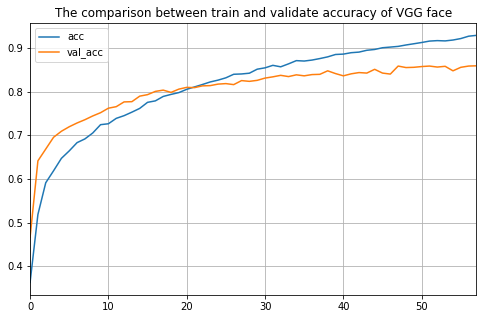

In [46]:
pd.DataFrame(history_VGGface.history).loc[:,['acc','val_acc']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.title('The comparison between train and validate accuracy of VGG face')
plt.show()

The accuracies of the train and validate set are closed and increased gradually in the same direction shown that the model is a good fit.

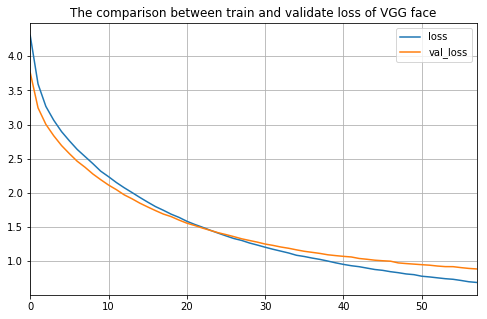

In [47]:
pd.DataFrame(history_VGGface.history).loc[:,['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.title('The comparison between train and validate loss of VGG face')
plt.show()

The evaluation cannot account on loss metric because the model applies dropout layer, which occurs only in the train set.

## 8) Model Evaluation and Visualization

In [56]:
# evaluate training accuracy
acc_trn = history_VGGface.model.evaluate_generator(generator = training_batch_generator, steps = training_batch_generator.__len__(), workers = 20)

In [58]:
print('The train accuracy is {0:0.2f}'.format(acc_trn[1]))

The train accuracy is 0.97


In [60]:
# evaluate testing accuracy
# perform the leave one out as the batch size = 1
acc_tst = history_VGGface.model.evaluate_generator(generator = testing_batch_generator, steps = testing_batch_generator.__len__(), workers = 20)

In [62]:
print('The test accuracy is {0:0.2f}'.format(acc_tst[1]))

The test accuracy is 0.84


In [40]:
# predict class probability
prob = history_VGGface.model.predict_generator(generator = testing_batch_generator, steps = testing_batch_generator.__len__(), workers = 20)

In [41]:
# create y predict
yhat = np.argmax(prob,axis=1)

In [42]:
# create y one hot coding
ytst_cat = to_categorical(ytst, num_classes=8)

The confusion matrix of Age group, without normalization


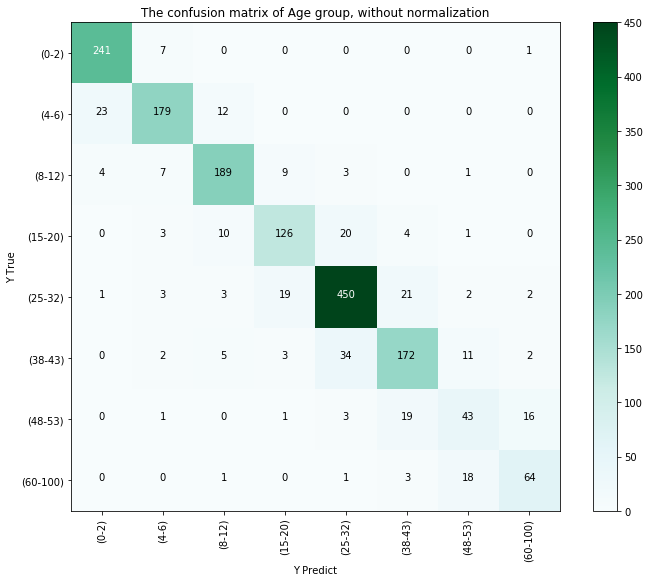

In [122]:
# create confusion matrix 
label_names = np.array(list(set(ytst)))
def plot_con_mat(cm, classes,
                 normalize=True,
                 title='The confusion matrix of Age group',
                 cmap=plt.cm.BuGn):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "The confusion matrix of Age group, with normalization"
        print(title)
    else:
        title = 'The confusion matrix of Age group, without normalization'
        print(title)

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Y True')
    plt.xlabel('Y Predict')

con_mat = confusion_matrix(ytst, yhat)

# Plot confusion matrix
fig = plt.figure()
fig.set_size_inches(10, 8, forward=True)
plot_con_mat(con_mat, classes = objects, normalize = False, title='The confusion matrix of Age group')

Due to imbalance class, the non-normalization confusion matric cannot tell you much about model performance on predicting the proper age group.

The confusion matrix of Age group, with normalization


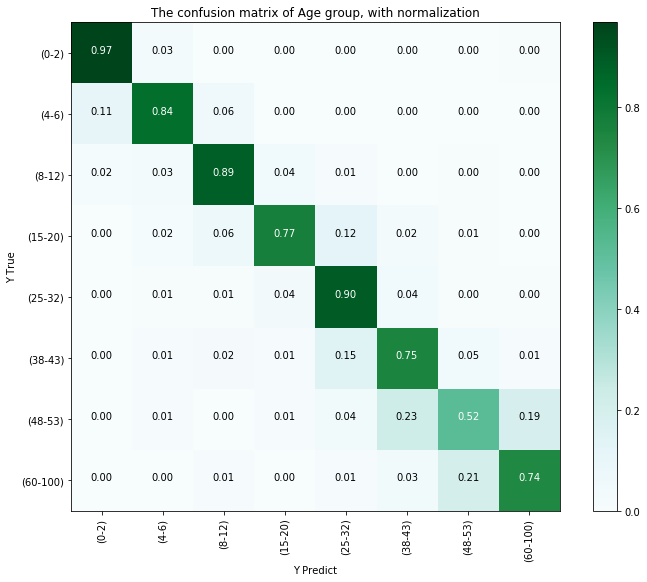

In [121]:
# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(10, 8, forward=True)
plot_con_mat(con_mat, classes = objects, normalize = True, title='The confusion matrix of Age group')

<p style="text-indent: 2.5em;">
The normalization confusion matric shows that the model predicts the age from the face image very well. However, the prediction of the samples in group 48-53 years old prone to have an error because the number of samples in this group is too small compared with other groups. The increasing of sample number will lead to increasing of model performance.

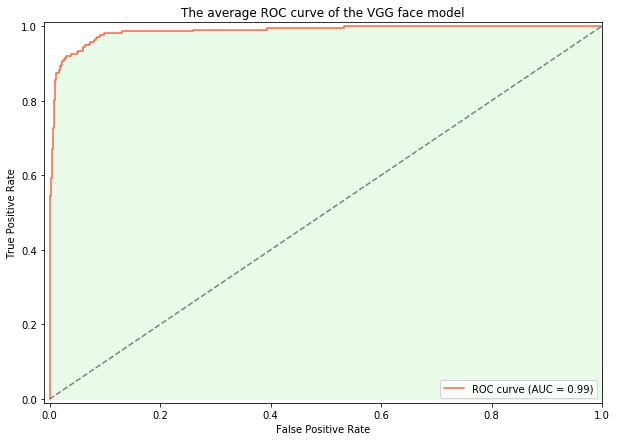

In [147]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(dict_age)):
    fpr[i], tpr[i], _ = roc_curve(ytst_cat[:, i], prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytst_cat.ravel(), prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure(figsize = (10,7))
plt.plot(fpr[2], tpr[2], color='tomato', label='ROC curve (AUC = {0:0.2f})'.format(roc_auc[2]))
plt.fill_between(fpr[2], tpr[2], alpha=0.2, color='lightgreen')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The average ROC curve of the VGG face model')
plt.legend(loc="lower right")
plt.show()

<p style="text-indent: 2.5em;">
    In this study, the ROC is not a useful metric to evaluate model performance. It's better to use other metrics such as PR curve, F1, and balanced accuracy instead.

Text(0.5, 1.0, 'The PR curve of the VGG face model')

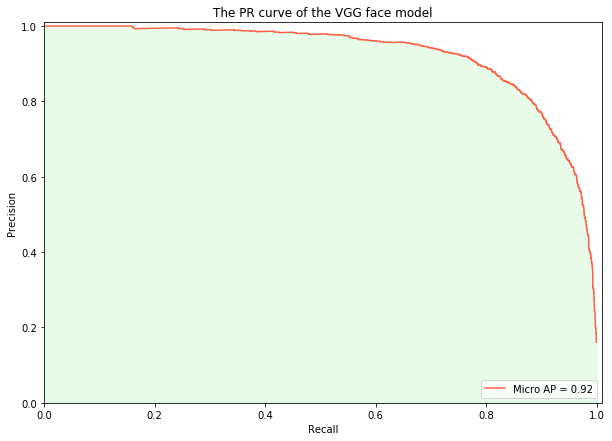

In [148]:
# Average PR curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(dict_age)):
    precision[i], recall[i], _ = precision_recall_curve(ytst_cat[:, i],
                                                        prob[:, i])
    average_precision[i] = average_precision_score(ytst_cat[:, i], prob[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(ytst_cat.ravel(), prob.ravel())
average_precision["micro"] = average_precision_score(ytst_cat, prob, average="micro")

plt.figure(figsize = (10,7))
plt.plot(recall['micro'], precision['micro'], color = 'tomato', label = 'Micro AP = {0:0.2f}'.format(average_precision["micro"]))
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='lightgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.01])
plt.legend(loc="lower right")
plt.title('The PR curve of the VGG face model')

<Figure size 432x288 with 0 Axes>

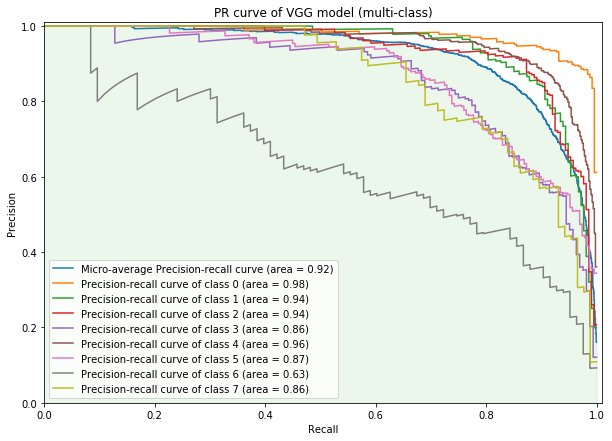

In [157]:
# Plot Precision-Recall curve for each class
plt.clf()
plt.figure(figsize = (10,7))
plt.plot(recall["micro"], precision["micro"],
         label='Micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))

for i in range(len(set(list(set(ytst))+list(set(yhat))))):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))
    plt.fill_between(recall["micro"], precision["micro"], alpha=0.02, color='lightgreen')

plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve of VGG model (multi-class)')
plt.legend(loc="lower left")
plt.show()

<p style="text-indent: 2.5em;">
    The micro average method is preferable to assess the model performance as well as the PR curve, which suitable for the imbalance multiclass study. The high number of micro AP (0.92 as shown in aliceblue area) indicate that the model has high performance in predicting age. However, the performance of age group 6 (48-53 years old) is quite low, which corresponding with the confusion matrix above.

In [81]:
print('The F1 of the model is {0:0.2f}'.format(f1_score(ytst, yhat, average='weighted')))

The F1 of the model is 0.84


In [82]:
print('The balanced accuracy of the model is {0:0.2f}'.format(balanced_accuracy_score(ytst, yhat)))

The balanced accuracy of the model is 0.80


<p style="text-indent: 2.5em;">
    For the imbalanced class study and the false negative and false positive do not affect human behaviour much (not much effect with the age prediction give the wrong age group), the appropriate evaluation matrics are F1 measure (0.84) and balanced accuracy (0.8), which indicate that the model performs very well and generalize to another work.

## 9) Conclusions, Suggestions, and Limitations

### <b> Conclusions
<p style="text-indent: 2.5em;">
    The study aims to predict age from face images, the model using deep learning, the convolutional neural network with transfer learning. The pre-trained networks used in this study are Resnet50 (with imagenet weight), and VGG faces (with VGG face weight). The aligned face images are retrieved from the Adience face image project, the open university of Israel, then resize and feed into the model in order to train the best model for face prediction.
<p style="text-indent: 2.5em;">
    The VGG face architecture (with VGG face weight) performs better than Resnet50 architecture (with imagenet weight). As a result, the comprehensive evaluation only performed on VGG model. There are eight classes of age including 0-2, 4-6, 8-12, 15-20, 25-32, 27-43, 48-53, and 60-100. Due to imbalanced class, the evaluation matric used F1, the harmonic mean of precision and recall, and another evaluation matric is balanced accuracy, which is a harmonic mean of sensitivity and specificity. The model F1 is 0.84, and the balanced accuracy is 0.80 The model is fit well with image data and more likely to generalize when applying with another dataset.

<p>
    
### <b> Suggestions
<p style="text-indent: 2.5em;">  
    There are two fine-tuned pre-trained models experiment in this study; Firstly, the Resnet50 model is one of the popular model architecture using in a convolutional neural network. However, the model performs poor in this study caused by the weight training which derived from imagenet is cover many domains such as animal, object, tool, plant, human, etc. The model with a specific field for weight training has the potential to outperform the former model. Secondly, the VGGface model is trained on the VGGface dataset provides higher performance compare with the Resnet50 model. However, the performance of the training set is slightly higher than the testing set. Increasing the dropout ratio may cause improving on performance and preventing the model from overfitting.
    
<p>

### <b> Limitations
<p style="text-indent: 2.5em;"> 
    There are some limitations of the study, 1) the computational power of the study laptop, which is not good enough to train the deep learning by online learning method. Batch training is used to solve this problem. 2) the limited budget for cloud computing services rental, the fine-tune model hyperparameters need high computational times, the study is used a google cloud platform, which is not an open-source application. The longer we train the model, the more we pay for the service. As a result, the author only provides a small amount of manual hyperparameter tuning following the good practice from online materials and textbooks.